# Before you start :
   - These exercises are related to the Pivot table and correlation lessons.
   - Keep in mind that you need to use some of the functions you learned in the previous lessons.
   - All datasets are provided in the `your-code` folder of this lab.
   - Elaborate your codes and outputs as much as you can.
   - Try your best to answer the questions and complete the tasks and most importantly enjoy the process!!!

#### Import all the libraries that are necessary

In [94]:
# import libraries here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Challenge 1

#### Open the ` Employee.csv` file and name your dataset `employee`

In [43]:
# your answer here
df=pd.read_csv('Employee.csv')
df

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30
3,Sonia,HR,Bachelor,F,analyst,4,35
4,Samuel,Sales,Master,M,associate,3,55
5,Eva,Sales,Bachelor,F,associate,2,55
6,Carlos,IT,Master,M,VP,8,70
7,Pedro,IT,Phd,M,associate,7,60
8,Ana,HR,Master,F,VP,8,70


#### What's the mean salary by department. 
##### Tip : There are 2 ways to do it - one way is with and the other way is without pivot tables. Do it both ways. 


In [12]:
# your answer here-1st way
pd.pivot_table(df,index=["Department"], values=['Salary'], aggfunc=np.mean)
##sets mean by default
## can use other aggregation methode by calling them in bracket: ex aggfunc=np.sum

,Salary
Department,
HR,45.00
IT,48.75
Sales,55.00


In [13]:
# your answer here-2nd way
df.groupby('Department')['Salary'].mean()

Department
HR       45.00
IT       48.75
Sales    55.00
Name: Salary, dtype: float64

#### We want now to group the data by more than one column. Use Pandas pivot table function to select the mean salary by department and title

In [14]:
# your answer here
pd.pivot_table(df,index=["Department","Title"], values=['Salary'], aggfunc=np.mean)


Salary
Department Title            
HR         VP           70.0
           analyst      32.5
IT         VP           70.0
           analyst      32.5
           associate    60.0
Sales      associate    55.0

#### We want to display the number of years of work experience and the salary for each Title. Add Years as a column in your pivot table
*Hint: Use Pandas doc(see References in README.md) to explore the pivot_table() arguments*

In [82]:
# your answer here
pd.pivot_table(df,index=["Department",'Title'], values=['Salary','Years'], aggfunc={'Salary':[np.mean],'Years':[np.sum]})


Salary Years
                       mean   sum
Department Title                 
HR         VP          70.0     8
           analyst     32.5     6
IT         VP          70.0     8
           analyst     32.5     3
           associate   60.0     7
Sales      associate   55.0     5

#### We want to know the information about the mean salary and number of employees in each department and for each job title

In [56]:
# your answer here
#df.groupby('Department')['Salary'].mean()['Name'].count()
#df.groupby('Department')['Name'].count()
pd.pivot_table(df,index=["Department"],values=["Salary"],aggfunc=[np.mean,len])


,mean,len
,Salary,Salary
Department,,
HR,45.00,3
IT,48.75,4
Sales,55.00,2


#### We want to know for each department and for each job title the Salary's median,minimum,maximum and standard deviation. Comment your results

In [71]:
# your answer here
#pd.pivot_table(df,index=["Department","Title"],values=["Salary"],aggfunc=[np.mean,np.median,min,max,np.std],fill_value=0)
pd.pivot_table(df, index = ['Department', 'Title'], values= 'Salary', aggfunc= [np.mean, np.median, min, max, np.std])

mean median    min    max       std
                     Salary Salary Salary Salary    Salary
Department Title                                          
HR         VP          70.0   70.0     70     70       NaN
           analyst     32.5   32.5     30     35  3.535534
IT         VP          70.0   70.0     70     70       NaN
           analyst     32.5   32.5     30     35  3.535534
           associate   60.0   60.0     60     60       NaN
Sales      associate   55.0   55.0     55     55  0.000000

#### Based on your comments, fill the missing values with an appropriate value

In [72]:
# your answer here
pd.pivot_table(df, index = ['Department', 'Title'], values= 'Salary', aggfunc= [np.mean, np.median, min, max, np.std],dropna=False,fill_value=0)

mean median    min    max       std
                     Salary Salary Salary Salary    Salary
Department Title                                          
HR         VP          70.0   70.0     70     70  0.000000
           analyst     32.5   32.5     30     35  3.535534
           associate    0.0    0.0      0      0  0.000000
IT         VP          70.0   70.0     70     70  0.000000
           analyst     32.5   32.5     30     35  3.535534
           associate   60.0   60.0     60     60  0.000000
Sales      VP           0.0    0.0      0      0  0.000000
           analyst      0.0    0.0      0      0  0.000000
           associate   55.0   55.0     55     55  0.000000

#### The stake holders want to know for each department the number of employees and how much money is spend on salaries. Could you provide that information? 

In [60]:
# your answer here
pd.pivot_table(df,index=["Department"],values=["Salary"],aggfunc=[np.sum,len])


,sum,len
,Salary,Salary
Department,,
HR,135,3
IT,195,4
Sales,110,2


#### For each Department and Title, we want to know the the total years of work experience and the mean salary

In [80]:
# your answer here
pd.pivot_table(df,index=["Department",'Title'],values=["Salary",'Years'],aggfunc={'Years':[np.sum],'Salary':[np.mean]})


Salary Years
                       mean   sum
Department Title                 
HR         VP          70.0     8
           analyst     32.5     6
IT         VP          70.0     8
           analyst     32.5     3
           associate   60.0     7
Sales      associate   55.0     5

#### Bonus

#### We now want to compute the mean salary after removing the maxima for each Department. Create the appropriate pivot table

#### * Hint: Write a custom function*

In [12]:
# your answer here--Your custom function here
        

In [13]:
# your answer here

# Challenge 2

#### Open the ` Fitbit.csv` file and name your dataset `fitbit`

In [87]:
# your answer here
fitbit=pd.read_csv('Fitbit.csv')
fitbit.head()

,Date,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,MinutesOfSleep,MinutesOfBeingAwake,NumberOfAwakings,LengthOfRestInMinutes
0,08-05-2015,1934,905,0.65,0,1.355,46,0,0,1680,384,26,23,417
1,09-05-2015,3631,18925,14.11,4,611.000,316,61,60,2248,454,35,21,491
2,10-05-2015,3204,14228,10.57,1,602.000,226,14,77,1719,387,46,25,436
3,11-05-2015,2673,6756,5.02,8,749.000,190,23,4,9620,311,31,21,350
4,12-05-2015,2495,502,3.73,1,876.000,171,0,0,7360,407,65,44,491


#### Explore you dataset in terms of data types and descriptive statistics
#### *Hint: Use Pandas functions from previous lectures*

In [89]:
# your answer here
fitbit.dtypes

Date                       object
Calorie burned              int64
Steps                       int64
Distance                  float64
Floors                      int64
Minutes Sedentary         float64
Minutes Lightly Active      int64
Minutes Fairly Active       int64
Minutes Very Active         int64
Activity Calories           int64
MinutesOfSleep              int64
MinutesOfBeingAwake         int64
NumberOfAwakings            int64
LengthOfRestInMinutes       int64
dtype: object

In [90]:
# your answer here
fitbit.describe

<bound method NDFrame.describe of            Date  Calorie burned  Steps  Distance  Floors  Minutes Sedentary  \
0    08-05-2015            1934    905      0.65       0              1.355   
1    09-05-2015            3631  18925     14.11       4            611.000   
2    10-05-2015            3204  14228     10.57       1            602.000   
3    11-05-2015            2673   6756      5.02       8            749.000   
4    12-05-2015            2495    502      3.73       1            876.000   
..          ...             ...    ...       ...     ...                ...   
362  03-05-2016            3796  18588     14.13      16            599.000   
363  04-05-2016            3525  16382     12.39      16            684.000   
364  05-05-2016            3649  21913     16.40      19            701.000   
365  06-05-2016            3539  19023     14.79      15            575.000   
366  07-05-2016             304   9526      7.08       2            564.000   

     Minutes Ligh

#### You suspect that there must be a linear relationship between the Minutes Very Active and the Steps. Compute the correlation between these variables.

In [91]:
# your answer here
fitbit['Minutes Very Active'].corr(fitbit['Steps'])

0.5714518481062608

#### Use matplotlib to visually plot Minutes Very active vs Steps. 

##### Hint : import matplotlib.pyplot as plt (See previous lessons)#####
- Use plt.scatter(x=df['col_name_1'], y=df['col_name_2'])

In [109]:
help(plt.scatter)

Help on function scatter in module matplotlib.pyplot:

scatter(x, y, s=None, c=None, marker=None, cmap=None, norm=None, vmin=None, vmax=None, alpha=None, linewidths=None, verts=<deprecated parameter>, edgecolors=None, *, plotnonfinite=False, data=None, **kwargs)
    A scatter plot of *y* vs. *x* with varying marker size and/or color.
    
    Parameters
    ----------
    x, y : float or array-like, shape (n, )
        The data positions.
    
    s : float or array-like, shape (n, ), optional
        The marker size in points**2.
        Default is ``rcParams['lines.markersize'] ** 2``.
    
    c : array-like or list of colors or color, optional
        The marker colors. Possible values:
    
        - A scalar or sequence of n numbers to be mapped to colors using
          *cmap* and *norm*.
        - A 2-D array in which the rows are RGB or RGBA.
        - A sequence of colors of length n.
        - A single color format string.
    
        Note that *c* should not be a single nu

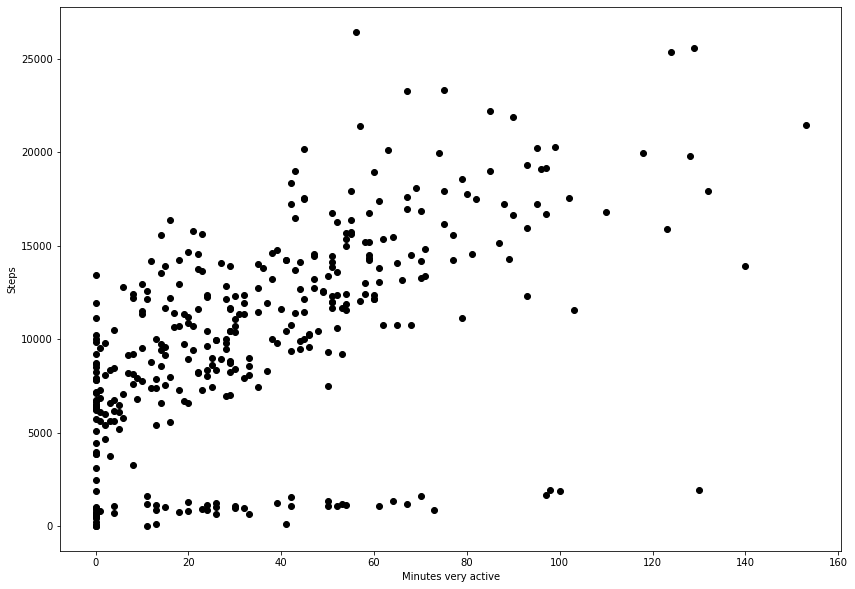

In [112]:
# your answer here
plt.figure(figsize=(14,10))
plt.xlabel('Minutes very active')
plt.ylabel('Steps')
plt.scatter(x=fitbit['Minutes Very Active'], y=fitbit['Steps'],c='black')

#### What can you say about Minute Very Active and Steps? Write a comment below

In [19]:
# your comment here

#### We also suspect that there must be a linear relationship between the Minutes Sedentary and the Steps. Compute the correlation between these variables.

In [114]:
# your answer here
fitbit['Minutes Sedentary'].corr(fitbit['Steps'])

0.07690608062990091

#### Use matplotlib to visually plot Minutes Sedentary vs Steps. Based on the results of the computed correlation and the plot. What can you say about these 2 variables?

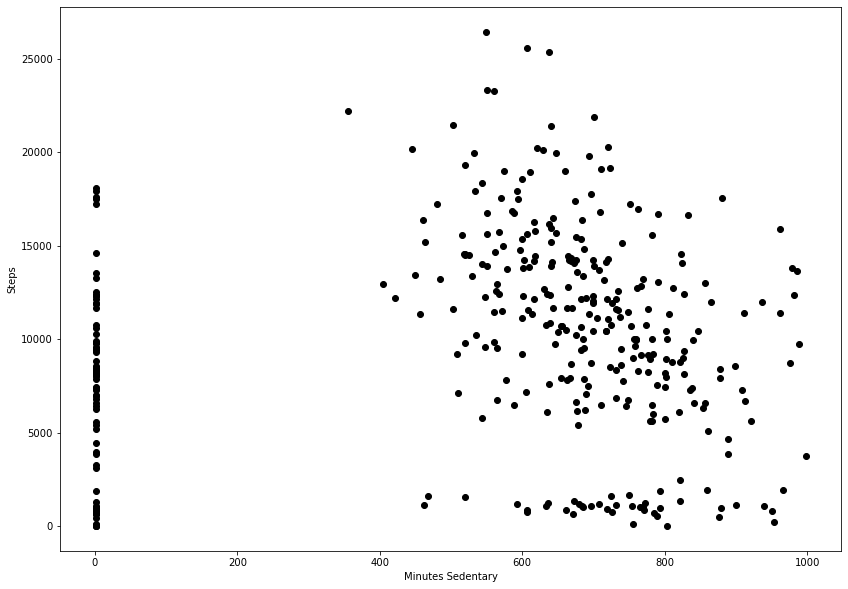

In [115]:
# your answer here
plt.figure(figsize=(14,10))
plt.xlabel('Minutes Sedentary')
plt.ylabel('Steps')
plt.scatter(x=fitbit['Minutes Sedentary'], y=fitbit['Steps'],c='black')

In [22]:
# Your comment here

#### We also suspect that there must be a linear relationship between the MinutesOfSleep and the Steps. Compute the correlation between these variables.

In [23]:
# your answer here

#### Use matplotlib to visually plot MinutesOfSleep vs Steps. Based on the results of the computed correlation and the plot. What can you say about these 2 variables?

In [24]:
# your answer here

#### Select a subset of your dataset with the columns below and compute the correlation matrix. Save the results in the variable `cor_fit`
column= ['Calorie burned', 'Steps','Floors','Minutes Sedentary','Minutes Very Active', 'MinutesOfSleep']

In [25]:
# your answer here

In [26]:
#Print cor_fit

#### Based on the result of the correlation matrix. What are the highly correlated features with the variable Steps?
*Hint: From the results above select the variable Steps and order your results in descending order (use Pandas sort_values function)*

In [27]:
# your answer here

# Challenge 3

#### Open the `Time_Grades.csv` file and name your dataset `time_grades`

In [28]:
# your answer here

In [29]:
#Print time_grades

#### Show visually the frequency distribution of the time_grades dataset.

In [30]:
# your answer here

#### Is there a correaltion between study time and Grade? Use both Pearson and Spearman correlation and comment your results.

In [31]:
# your answer here-Pearson 

In [32]:
## your answer here-Spearman

#### Use matplotlib to visually plot Study time vs Grade. Based on the results of the computed correlation and the plot. What can you say about these 2 variables?

In [33]:
# your answer here

In [34]:
#your comment here

#### Could you explain the difference between Pearson and Spearman correlation? (see References in README.md) 

In [35]:
#your comment here